## Álgebra lineal computacional - Métodos de Descenso
##### Nazareno A. Faillace Mullen

In [1]:
import plotly
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# Puede ser que aparezca un error por no tener instalada la librería ipympl. 
# En ese caso, descomentar la siguiente línea y correrla:
# pip install ipympl

Funciones auxiliares para graficar:

In [3]:
def plot_fun(f, limites, puntos=None):
    """ 
    Función que realiza gráficos interactivos en 3D
    f : es la función a graficar (tiene que ir de R2 en R)
    limites: es una lista o tupla de números: [a,b,c,d]. Va a graficar la función en el cuadrado [a,b] x [c,d]
    puntos (opcional): lista de puntos en R3 para graficar sobre la superficie. Por ejemplo: [[0,0,0], [1,2,3]] 
    para marcar el origen y el punto (1,2,3).
    """
    plt.figure()
    x = np.linspace(limites[0], limites[1], 1000)
    y = np.linspace(limites[2], limites[3], 1000)
    X, Y = np.meshgrid(x, y)
    Z = f((X, Y))
    ax = plt.axes(projection='3d', computed_zorder=False)
    ax.plot_surface(X, Y, Z, alpha=0.9)
    if puntos is not None:
        for p in puntos:
            ax.scatter([p[0]], [p[1]], [p[2]], color='r', s=50)
    plt.tight_layout()
    plt.show()

    
def plot_curvas_nivel(f, limites):
    """ 
    Función que grafica curvas de nivel.
    f : es la función a graficar (tiene que ir de R2 en R)
    limites: es una lista o tupla de números: [a,b,c,d]. Va a graficar la función en el cuadrado [a,b] x [c,d]
    """
    plt.figure()
    x = np.linspace(limites[0], limites[1], 1000)
    y = np.linspace(limites[2], limites[3], 1000)
    X, Y = np.meshgrid(x, y)
    Z = f((X, Y))
    plt.contour(X,Y,Z, cmap='plasma')
    plt.tight_layout()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    
def plot_mapa_calor(f, limites):
    """ 
    Función que grafica el mapa de calor.
    f : es la función a graficar (tiene que ir de R2 en R)
    limites: es una lista o tupla de números: [a,b,c,d]. Va a graficar la función en el cuadrado [a,b] x [c,d]
    """
    plt.figure()
    x = np.linspace(limites[0], limites[1], 1000)
    y = np.linspace(limites[2], limites[3], 1000)
    X, Y = np.meshgrid(x, y)
    Z = f((X, Y))
    plt.pcolormesh(X,Y,Z, shading='gouraud', cmap='plasma')
    plt.tight_layout()
    plt.show()
    
def forma_cuadratica(A, b, eta):
    """ Esta función convierte la forma matricial en forma cuadrática para graficar """
    def f(x):
        return 0.5*A[0,0]*(x[0]**2) + 0.5*A[1,1]*(x[1]**2) + A[0,1]*x[1]*x[0] - b[0]*x[0] - b[1]*x[1] + eta
    return f

# Formas cuadráticas

Ejemplos de distintos casos del criterio del Hessiano para formas cuadráticas:<br>

### **Ejemplo $1.i)$: $\lambda_1\lambda_2>0\;\wedge\; \lambda_1>0$**
$$
A = \begin{pmatrix}
2 & 0 \\
0 & 1
\end{pmatrix}
\qquad
b = \begin{pmatrix}
0 \\
0
\end{pmatrix}
\qquad
\eta = 0
$$

Calculamos autovalores y graficamos para corroborar que cumple el criterio del Hessiano:

Autovalores de A:  [2. 1.]


<IPython.core.display.Javascript object>


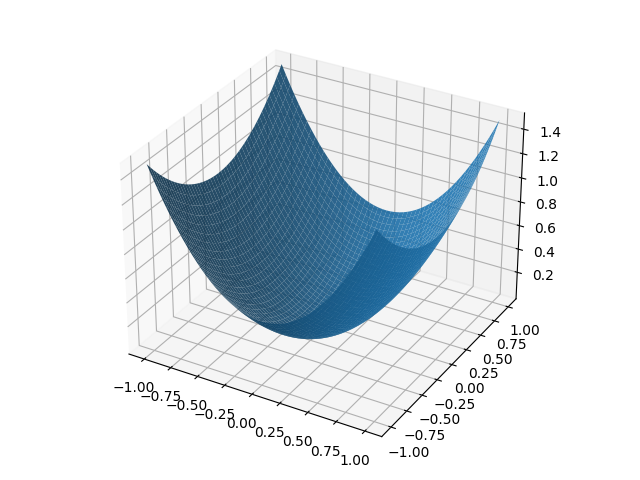

In [4]:
A = np.array([[2, 0], [0, 1]])
b = np.array([0,0])
eta = 0
print('Autovalores de A: ', np.linalg.eigvals(A))
f = forma_cuadratica(A, b, eta)
plot_fun(f, [-1,1,-1,1])

### **Ejemplo $1.ii)$: $\lambda_1\lambda_2>0\;\wedge\; \lambda_1<0$**
$$
A = \begin{pmatrix}
-2 & -1 \\
-1 & -2
\end{pmatrix}
\qquad
b = \begin{pmatrix}
-\frac{1}{2} \\
0
\end{pmatrix}
\qquad
\eta=1
$$

Calculamos autovalores y graficamos para corroborar que cumple el criterio del Hessiano:

Autovalores de A:  [-1. -3.]


<IPython.core.display.Javascript object>


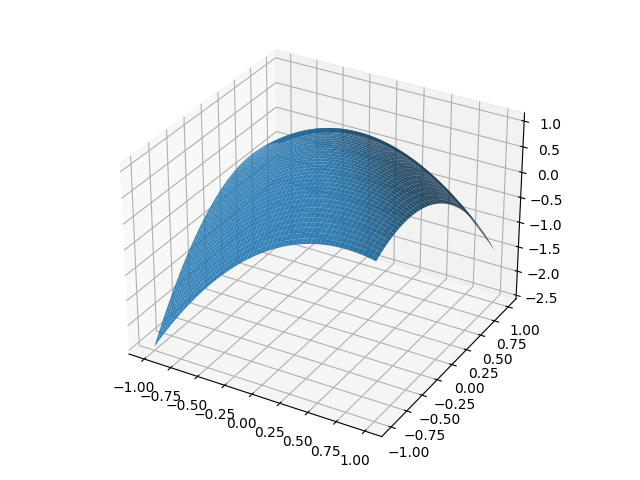

In [5]:
A = np.array([[-2, -1], [-1, -2]])
b = np.array([-0.5,0])
eta = 1
print('Autovalores de A: ', np.linalg.eigvals(A))
f = forma_cuadratica(A, b, eta)
plot_fun(f, [-1,1,-1,1])

### **Ejemplo $2)$: $\lambda_1\lambda_2<0$**
$$
A = \begin{pmatrix}
-2 & 0 \\
0 & 1
\end{pmatrix}
\qquad
b = \begin{pmatrix}
0 \\
0
\end{pmatrix}
\qquad
\eta = 1
$$

Calculamos autovalores y graficamos para corroborar que cumple el criterio del Hessiano:

Autovalores de A:  [-2.  1.]


<IPython.core.display.Javascript object>


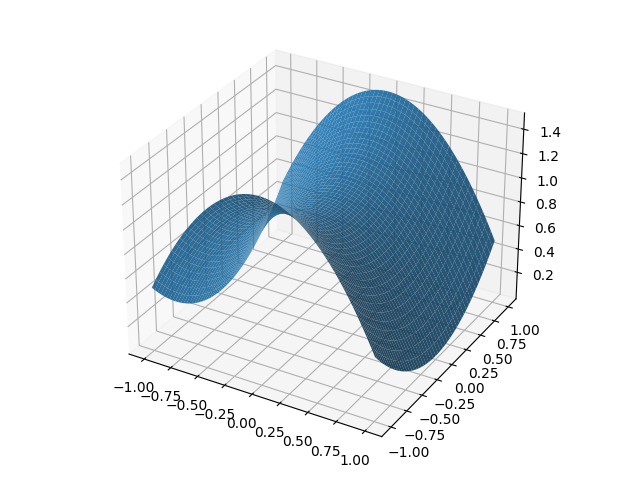

In [6]:
A = np.array([[-2, 0], [0, 1]])
b = np.array([0,0])
eta = 1
print('Autovalores de A: ', np.linalg.eigvals(A))
f = forma_cuadratica(A, b, eta)
plot_fun(f, [-1,1,-1,1])

Veamos qué ocurre con las curvas de nivel:

<IPython.core.display.Javascript object>


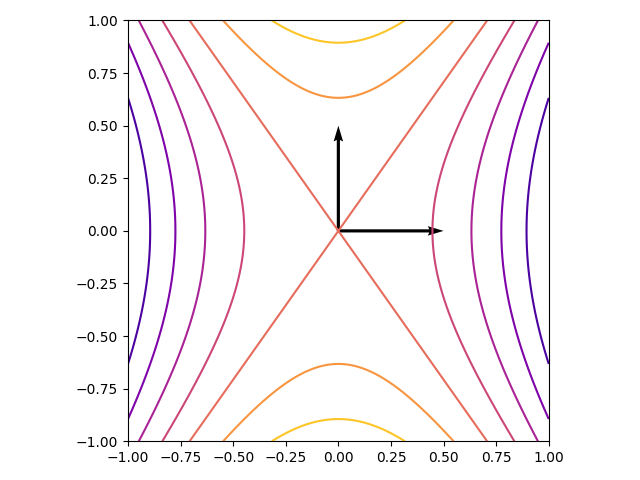

In [7]:
plot_curvas_nivel(f, [-1,1,-1,1])

# Añadimos al gráfico los autovectores
C = np.linalg.eig(A)[1].T
origen = np.array([[0,0], [0,0]])
plt.quiver(*origen, C[:,0], C[:, 1], scale_units='xy', scale=2)

### **Ejemplo 3: $\lambda_1\lambda_2=0$**

$$
A = \begin{pmatrix}
-4 & 4 \\
4 & -4
\end{pmatrix}
\qquad
b = \begin{pmatrix}
0 \\
0
\end{pmatrix}
\qquad
\eta = 0
$$

Esta matriz en particular tiene más de un máximo (es **semi**definida negativa). En particular, $-A$ es semidefinida positiva, y tiene varios puntos donde se realiza el mínimo. 

Autovalores de A:  [ 0. -8.]


<IPython.core.display.Javascript object>


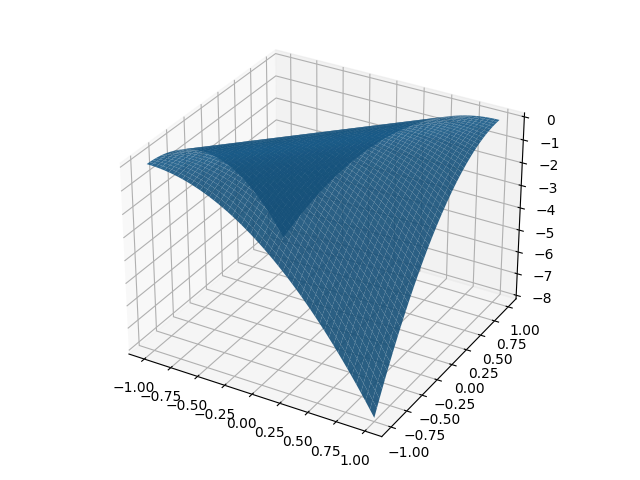

In [8]:
A = np.array([[-4, 4], [4, -4]])
b = np.array([0,0])
eta = 0
print('Autovalores de A: ', np.linalg.eigvals(A))
f = forma_cuadratica(A, b, eta)
plot_fun(f, [-1,1,-1,1])

# Método del gradiente

Pseudocódigo:

Método_gradiente($A$,$b$,$x^{(0)}$, $max\_iter$):<br>
&nbsp; &nbsp; diff = $\infty$ <br>
&nbsp; &nbsp; $k$ = $0$ <br>
&nbsp; &nbsp; $r^{(0)}$ = $b-Ax^{(0)}$ &nbsp; &nbsp; `# Dirección del primer paso paso` <br> 
&nbsp; &nbsp; while $k\leq max\_iter$ and diff $> 10^{-5}$: <br>
&nbsp; &nbsp; &nbsp; &nbsp; $t$ = $\dfrac{r^{(k)t}r^{(k)}}{r^{(k)t}Ar^{(k)}}$ &nbsp; &nbsp; `# Determino la longitud del paso` <br>
&nbsp; &nbsp; &nbsp; &nbsp; $x^{(k+1)}$ = $x^{(k)} + tr^{(k)}$ &nbsp; &nbsp; `# Calculo el siguiente punto de la iteración ("doy el paso")`<br> 
&nbsp; &nbsp; &nbsp; &nbsp; $r^{(k+1)}$ = $b - Ax^{(k+1)}$  &nbsp; &nbsp; `# Dirección del próximo paso` <br>
&nbsp; &nbsp; &nbsp; &nbsp; diff = $\lVert r^{(k+1)}\rVert$  &nbsp; &nbsp; `# Norma del residuo` <br>
&nbsp; &nbsp; &nbsp; &nbsp; $k$ = $k+1$ <br>

### Ejemplo:

$$
A = \begin{pmatrix}
6 & -1 \\
-1 & 10
\end{pmatrix}
\qquad
b = \begin{pmatrix}
-2 \\
1
\end{pmatrix}
\qquad
\eta = 1
$$

In [13]:
A = np.array([[6, -1], [-1, 10]])
b = np.array([-2,1])
eta = 1
print('Autovalores de A: ', np.linalg.eigvals(A))
print('El mínimo de la forma cuadrática se alcanza en: ', np.linalg.solve(A, b))

Autovalores de A:  [ 5.76393202 10.23606798]
El mínimo de la forma cuadrática se alcanza en:  [-0.3220339   0.06779661]


[-0.32203327  0.06779632]
Cantidad de iteraciones:  12


<IPython.core.display.Javascript object>


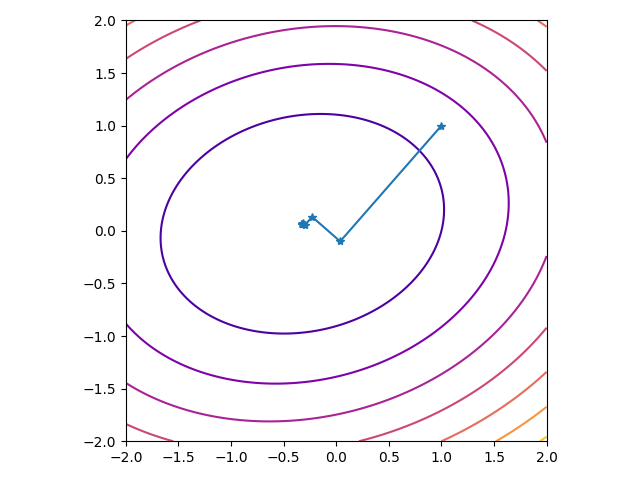

In [14]:
x0 = np.array([1,1])
f = forma_cuadratica(A, b, eta)
X = metodo_gradiente(A,b,x0)
print(X[-1])
print('Cantidad de iteraciones: ', len(X))
plot_curvas_nivel(f,[-2, 2, -2, 2])
plt.plot(X[:,0], X[:,1], '*-')

## Método del Gradiente Conjugado

Quisiéramos "corregir" la dirección del Método del Gradiente para que converja más rápido. <br>
**Idea (en $\mathbb{R}^2$):** la primera iteración es igual a la del Método del gradiente: avanzamos en dirección $r^{(0)}=-\nabla f(x^{(0)})$ para llegar a $x^{(1)}$. Ahora, quisiéramos que la dirección del próximo paso sea hacia el óptimo $x^\ast$, o sea, avanzar en dirección $d^\ast=x^\ast-x^{(1)}$. Observar que:
$$d^\ast=x^\ast-x^{(1)}= x^\ast - x^{(0)} - t^{(0)}r^{(0)}$$
El problema es que obviamente no sabemos quién es $x^\ast$. Sin embargo, puede probarse que: <br>
**Proposición:** $\langle d^\ast, r^{(0)}\rangle_A=0$

Esto nos motiva a pensar que lo mejor es avanzar en direcciones A-ortogonales, que llamaremos $s^{(k)}$. Tomamos $s^{(0)}=r^{(0)}$. <br>
**Con aritmética exacta**, si $A\in\mathbb{R}^{n\times n}$ es simétrica definida positiva, el método de gradiente encuentra la solución de $Ax=b$ en $n$ iteraciones. Es decir, es un método exacto (si no hay error de redondeo).

<IPython.core.display.Javascript object>


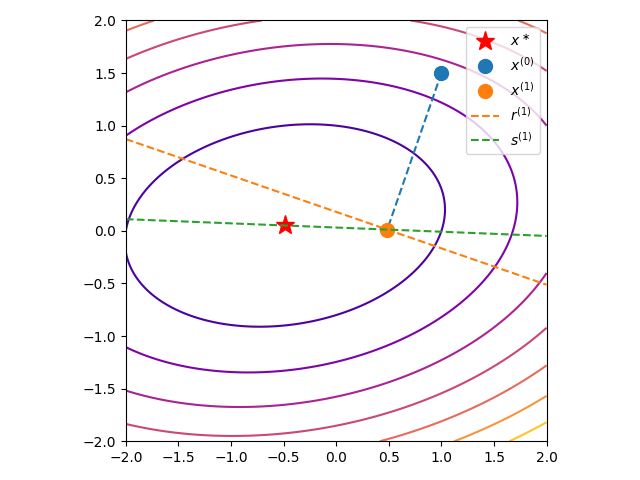

In [15]:
A = np.array([[4, -1], [-1, 10]])
b = np.array([-2,1])
eta = 1
x0 = np.array([1,1.5])
f = forma_cuadratica(A, b, eta)


# Graficamos las curvas de nivel de f
plot_curvas_nivel(f,[-2, 2, -2, 2])

# Graficamos la solución
x_opt = np.linalg.solve(A,b)   # Calculo cuál sería la solución
plt.plot(*x_opt, 'r*', ms=14, label=r'$x^\ast$')

# Graficamos la primera iteración del método del gradiente
r0 = b - A @ x0
t0 = (r0 @ r0) / (r0 @ (A @ r0))
x1 = x0 + t0*r0
plt.plot((x0[0], x1[0]),(x0[1], x1[1]),'--')
plt.plot(*x0, 'o', c='C0', label=r'$x^{(0)}$', ms=10)
plt.plot(*x1, 'o', c='C1', label=r'$x^{(1)}$', ms=10)

# Graficamos la dirección de -grad(f)(x1)
r1 = b - A @ x1
plt.axline(x1, x1+r1, ls='--', c='C1', label='$r^{(1)}$')
plt.xlim(-2,2)  #

# Graficamos la direccion del método del gradiente (es decir, la A-ortogonal a r0)
s0 = r0
s1 = r1 + (r1 @ r1)/(r0 @ r0)*s0
plt.axline(x1, x1+s1, ls='--', c='C2', label='$s^{(1)}$')

plt.legend()

Pseudocódigo:

Método_gradiente_conjugado($A$,$b$,$x^{(0)}$, $tol$): &nbsp; &nbsp; `# tol es la tolerancia de error` <br>
&nbsp; &nbsp; diff = $\infty$ <br>
&nbsp; &nbsp; $k$ = $0$ <br>
&nbsp; &nbsp; $r^{(0)}$ = $b-Ax^{(0)}$ &nbsp; &nbsp; `# Dirección del primer paso` <br>
&nbsp; &nbsp; $s^{(0)}$ = $r^{(0)}$ &nbsp; &nbsp; `# El primer paso es igual al método del gradiente` <br>
&nbsp; &nbsp; while diff $>tol$: <br>
&nbsp; &nbsp; &nbsp; &nbsp; $t$ = $\dfrac{r^{(k)t}r^{(k)}}{s^{(k)t}As^{(k)}}$ &nbsp; &nbsp; `# Determino la longitud del paso` <br>
&nbsp; &nbsp; &nbsp; &nbsp; $x^{(k+1)}$ = $x^{(k)} + ts^{(k)}$ &nbsp; &nbsp; `# Calculo el siguiente punto de la iteración ("doy el paso")`<br> 
&nbsp; &nbsp; &nbsp; &nbsp; $r^{(k+1)}$ = $b - Ax^{(k+1)}$  &nbsp; &nbsp; `# Dirección del próximo paso del metodo del gradiente` <br>
&nbsp; &nbsp; &nbsp; &nbsp; $s^{(k+1)}$ = $r^{(k+1)} + \dfrac{r^{(k+1)t}r^{(k+1)}}{r^{(k)t}r^{(k)}}s^{(k)}$  &nbsp; &nbsp; `# A-ortogonalizo` <br>
&nbsp; &nbsp; &nbsp; &nbsp; diff = $\lVert r^{(k+1)}\rVert$  &nbsp; &nbsp; `# Norma del residuo` <br>
&nbsp; &nbsp; &nbsp; &nbsp; $k$ = $k+1$ <br>

Sugerencia: como para calcular $s^{(k+1)}$ necesitamos $r^{(k+1)}$ y $r^{(k)}$, asignar $r^{(k)}$ a una variable `r_ant` antes de calcular $r^{(k+1)}$.

Probamos el método del gradiente conjugado para una matriz simétrica definida positiva aleatoria de $\mathbb{R}^{n\times n}$:

In [16]:
n = 4  # Dimension del problema
B = np.random.rand(n,n)
A = B.T @ B
b = np.random.rand(n)

x0 = np.random.rand(n)

# Solucion exacta
xsol = np.linalg.solve(A, b)

# Gradiente conjugado
X = metodo_gradiente_conjugado(A,b,x0)
print('Cantidad de iteraciones GC: ', len(X))
print('Residuo: ', np.linalg.norm(X[-1]- xsol))

# Método del gradiente
X = metodo_gradiente(A, b, x0,max_iter=10000)
print('Cantidad de iteraciones Método del gradiente: ', len(X))
print('Residuo: ', np.linalg.norm(X[-1]- xsol))

Cantidad de iteraciones GC:  5
Residuo:  1.3432462966795172e-10
Cantidad de iteraciones Método del gradiente:  1494
Residuo:  0.003710852336147239


## (Muy pequeña) ayuda para implementar los métodos (Ej 15 y Ej 18 Pr. 5) 

In [ ]:
def metodo_gradiente(A, b, x, max_iter=100):
    X = [x]
    # COMPLETAR (hace falta más de una línea de código)
    while #COMPLETAR:
        # COMPLETAR (hace falta más de una línea de código)        
        X.append(x)
        k += 1
    return np.array(X)


def metodo_gradiente_conjugado(A, b, x, tol=1e-5):
    X = [x]
    # COMPLETAR (hace falta más de una línea de código)
    while # completar:
        # COMPLETAR (hace falta más de una línea de código)
        X.append(x)
    return np.array(X)